In [2]:
pip install pymed

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography and will be removed in a future release.
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [4]:
import nucleus_api, nucleus
import os
import csv
import json
import datetime
import time
from nucleus_api.rest import ApiException
import nucleus_api.api.nucleus_api as nucleus_helper
from pprint import pprint
import numpy as np
from pathlib import Path
from pymed import PubMed

configuration = nucleus_api.Configuration()
# configuration.host = 'localhost:5000'
configuration.host = 'http://localhost:5000/'
configuration.api_key['x-api-key'] = 'VRgaGSWm'

api_instance = nucleus_api.NucleusApi(nucleus_api.ApiClient(configuration))

/usr/local/lib/python3.6/dist-packages/pymongo/pyopenssl_context.py:26: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography and will be removed in a future release.
  from cryptography.x509 import load_der_x509_certificate as _load_der_x509_certificate
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [12]:
from flask import Flask, render_template
app = Flask(__name__)

@app.route('/')
def hello():
    return "pikachu"

@app.route('/home')
def home():
    # str | Fulltext query, using mysql MATCH boolean query format. Example, (\"word1\" OR \"word2\") AND (\"word3\" OR \"word4\") (optional)
    query = ''
    custom_stop_words = [] # str | List of stop words. (optional)
    num_topics = 5 # int | Number of topics to be extracted from the dataset. (optional) (default to 8)
    metadata_selection = "" # dict | JSON object specifying metadata-based queries on the dataset, of type {"metadata_field": "selected_values"} (optional)
    #time_period = ""     # str | Time period selection. Choices: ["1M","3M","6M","12M","3Y","5Y",""] (optional)
    remove_redundancies = True # bool | If True, this option removes quasi-duplicates from the analysis. A quasi-duplicate would have the same NLP representation, but not necessarily the exact same text. (optional) (default True)

    #compute topics:
    payload = nucleus_api.Topics(dataset=dataset,                                
                                    query=query,                   
                                    custom_stop_words=custom_stop_words,     
                                    num_topics=num_topics,
                                    metadata_selection=metadata_selection,
                                    remove_redundancies=remove_redundancies)
        
    api_response = api_instance.post_topic_api(payload) 
    input_array = [["Topic", "Strength"]] + [[topic.keywords, float(topic.strength)] for topic in api_response.result.topics]
    return render_template('home.html', inputArray = input_array)

if __name__ == '__main__':
    app.run(host = "0.0.0.0", port=5002)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://172.17.0.2:5002/ (Press CTRL+C to quit)
172.17.0.1 - - [26/Feb/2023 18:23:08] "GET /home HTTP/1.1" 200 -


In [2]:
try:
    ip = get_ipython()
    running_notebook = True
except NameError:
    running_notebook = False
print(running_notebook)

True


In [8]:


pubmed = PubMed(tool="NLPLahont", email="21tuong.dc@vinuni.edu.vn")
results = pubmed.query("(e[Title]) AND ([DOI])", max_results=5)
for article in results:
    print (article.title)

Investigating the Impact of E-Cigarette Price and Tax on E-Cigarette Use Behavior.
Extracellular vesicles are conduits for E. coli heat-labile enterotoxin (LT) and the B-subunits of LT and cholera toxin in immune cell-to-cell communication.
Phenylethanoid glycosides extract from Cistanche deserticola ameliorates atherosclerosis in apolipoprotein E-deficient mice and regulates intestinal PPARγ-LXRα-ABCA1 pathway.
The Evaluation of Vitamin E and TiO
Essential Oils and Biological Activities of 


In [5]:
dataset = 'dataset_test'
#create dataset

In [10]:
nucleus.Dataset.delete_dataset(dataset)
pubmed = PubMed(tool="NLPLahont", email="21tuong.dc@vinuni.edu.vn")
results = pubmed.query("(e[Title]) AND ([DOI])", max_results=1000)
for article in results:
    newdocument = {}
    newdocument["title"] = article.title
    if type(article.publication_date) == str:
        newdocument["time"] = article.publication_date
    else:
        newdocument["time"] = article.publication_date.strftime("%Y-%m-%d")
    newdocument["content"] = article.abstract
    # load into dataset
    payload = nucleus_api.Appendjsonparams(dataset=dataset,
                                       document=newdocument)
    try:
        api_response = api_instance.post_append_json_to_dataset(payload)
        print(api_response.result)
    except ApiException as e:
        api_error = json.loads(e.body)
        print('ERROR:', api_error['message'])


INFO: Dataset named dataset_test not found
{'n_documents': 1, 'size': 1615}
{'n_documents': 2, 'size': 1512}
{'n_documents': 3, 'size': 1369}
{'n_documents': 4, 'size': 711}
{'n_documents': 5, 'size': 263}
{'n_documents': 6, 'size': 52}
{'n_documents': 7, 'size': 1187}
{'n_documents': 8, 'size': 1195}
{'n_documents': 9, 'size': 696}
{'n_documents': 10, 'size': 544}
{'n_documents': 11, 'size': 1336}
{'n_documents': 12, 'size': 1367}
{'n_documents': 13, 'size': 58}
{'n_documents': 14, 'size': 1239}
{'n_documents': 15, 'size': 220}
{'n_documents': 16, 'size': 428}
{'n_documents': 17, 'size': 1829}
{'n_documents': 18, 'size': 460}
ERROR: {'message': 'document must have nonempty content and title'}
{'n_documents': 19, 'size': 1128}
ERROR: {'message': 'document must have nonempty content and title'}
{'n_documents': 20, 'size': 747}
{'n_documents': 21, 'size': 525}
{'n_documents': 22, 'size': 15}
{'n_documents': 23, 'size': 1587}
ERROR: {'message': 'document must have nonempty content and tit

In [6]:
# str | Fulltext query, using mysql MATCH boolean query format. Example, (\"word1\" OR \"word2\") AND (\"word3\" OR \"word4\") (optional)
query = ''
custom_stop_words = [] # str | List of stop words. (optional)
num_topics = 5 # int | Number of topics to be extracted from the dataset. (optional) (default to 8)
metadata_selection = "" # dict | JSON object specifying metadata-based queries on the dataset, of type {"metadata_field": "selected_values"} (optional)
#time_period = ""     # str | Time period selection. Choices: ["1M","3M","6M","12M","3Y","5Y",""] (optional)
remove_redundancies = True # bool | If True, this option removes quasi-duplicates from the analysis. A quasi-duplicate would have the same NLP representation, but not necessarily the exact same text. (optional) (default True)

#compute topics:
payload = nucleus_api.Topics(dataset=dataset,                                
                                 query=query,                   
                                 custom_stop_words=custom_stop_words,     
                                 num_topics=num_topics,
                                 metadata_selection=metadata_selection,
                                 remove_redundancies=remove_redundancies)
    
api_response = api_instance.post_topic_api(payload) 
#create a json file topics.json containing only topic keywords, weights and strength
topics = [{'keywords':topic.keywords, 
           'keywords_weight':topic.keywords_weight, 
           'strength':topic.strength} for topic in api_response.result.topics]
# print(json.dumps(topics, indent=4, ensure_ascii=False))
input_array = [["Topic", "Strength"]] + [[topic.keywords, topic.strength] for topic in api_response.result.topics]
# with open('demo_topics.json', 'w') as outfile:
# with open('/demo/demo_topics.json', 'w') as outfile:
#     json.dump(topics, outfile, indent=4, ensure_ascii=False)

In [47]:
pip install ipympl

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography and will be removed in a future release.
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 511 kB 976 kB/s            
     |████████████████████████████████| 510 kB 3.8 MB/s            
     |████████████████████████████████| 508 kB 6.6 MB/s            
     |████████████████████████████████| 508 kB 269 kB/s            
     |████████████████████████████████| 507 kB 228 kB/s            
     |████████████████████████████████| 123 kB 180 kB/s            
     |████████████████████████████████| 245 kB 200 kB/s            
     |████████████████████████████████| 1.6 MB 53 kB/s             
     |████████████████████████████████| 9.9 MB 294 kB/s            
     |████████████████████████████████| 178 kB 293 kB/s            
     |█████████████████

In [52]:
%matplotlib widget

['cigarette users;current cigarette;tobacco cigarette;non smokers;compared non;users nicotine;dual users;users dual', 'hepatitis virus;virus hev;hev infection;viral hepatitis;public health;acute viral;hev major;hepatitis worldwide', 'covid pandemic;students learning;outcome divide;digital outcome;social media;learning covid;nursing students;coronavirus disease', 'cross sectional;sectional study;study conducted;sectional survey;study aimed;sectional descriptive;preeclampsia women;onset preeclampsia', 'cigarettes cigarettes;smoking cessation;electronic cigarettes;cigarette smoking;long term;combustible cigarettes;cigarettes smoking;cigarettes combustible']
[0.2099, 0.2022, 0.2189, 0.1848, 0.184]


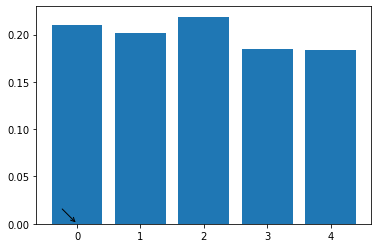

In [55]:
import matplotlib.pyplot as plt
# plot

topics = list([topic.keywords for topic in api_response.result.topics])
values = list([(float)(topic.strength) for topic in api_response.result.topics])
print(topics)
print(values)

fig=plt.figure()
ax=plt.subplot()

xpos=np.arange(len(topics))

bars = plt.bar(xpos,values)


annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="black", ec="b", lw=2),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(True)

def update_annot(bar):
    x = bar.get_x()+bar.get_width()/2.
    y = bar.get_y()+bar.get_height()
    annot.xy = (x,y)
    text = "({:.2g},{:.2g})".format(x,y)
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        for bar in bars:
            cont, ind = bar.contains(event)
            if cont:
                update_annot(bar)
                annot.set_visible(True)
                fig.canvas.draw_idle()
                return
    if vis:
        annot.set_visible(False)
        fig.canvas.draw_idle()

fig.canvas.mpl_connect("button_press_event", hover)

plt.show()

In [54]:
%matplotlib inline

In [11]:
query = '(cancer) AND (method)'
custom_stop_words = [] # str | List of stop words. (optional)
num_topics = 5 # int | Number of topics to be extracted from the dataset. (optional) (default to 8)
#num_keywords = 8 # int | Number of keywords per topic that is extracted from the dataset. (optional) (default to 8)
summary_length = 6 # int | The maximum number of bullet points a user wants to see in each topic summary. (optional) (default to 6)
context_amount = 0 # int | The number of sentences surrounding key summary sentences in the documents that they come from. (optional) (default to 0)
num_docs = 20 # int | The maximum number of key documents to use for summarization. (optional) (default to 20)
excluded_docs = '' # str | List of document IDs that should be excluded from the analysis. Example, ["docid1", "docid2", ..., "docidN"]  (optional)
remove_redundancies = True # bool | If True, this option removes quasi-duplicates from the analysis. A quasi-duplicate would have the same NLP representation, but not necessarily the exact same text. (optional) (default True)

try:
    payload = nucleus_api.TopicSummaryModel	(dataset=dataset, 
                                             query=query,
                                             custom_stop_words=custom_stop_words, 
                                             num_topics=num_topics, 
                                             metadata_selection=metadata_selection,
                                             summary_length=summary_length, 
                                             context_amount=context_amount, 
                                             num_docs=num_docs)
    api_response = api_instance.post_topic_summary_api(payload)
    api_ok = True
except ApiException as e:
    api_error = json.loads(e.body)
    print('ERROR:', api_error['message'])
    api_ok = False

if api_ok:
    for i,res in enumerate(api_response.result):
        print('Topic', i, 'summary:')
        print('    Keywords:', res.keywords)
        for j in range(len(res.summary)):
            print(res.summary[j])
        print('---------------')

Topic 0 summary:
    Keywords: cue myr;vitro explored;silico methods;properties combination;potential anti;nsclc properties;myr colocynthis;methods vitro;identified silico;explored anti;components cue;colocynthis identified;anti nsclc
{'attribute': {'counts': None, 'time': 1674864000},
 'doc_id': '13942096890963153445',
 'sentences': "['The potential anti-cancer components (CuE and Myr) of C "
              'colocynthis were identified using in-silico methods and further '
              'in vitro explored the anti-NSCLC properties of the combination '
              "of CuE and Myr.']",
 'title': 'Synergistic effect of cucurbitacin E and myricetin on '
          'Anti-Non-Small cell lung cancer: Molecular mechanism and '
          'therapeutic potential.'}
---------------
Topic 1 summary:
    Keywords: vivo sentinel;sentinel lymph;sectioned hematoxylin;nodes slns;metastasis assessment;lymph nodes;intraoperative breast;image evaluation;hematoxylin eosin;frozen sectioned;evaluation curren

In [9]:
dataset = 'dataset_test'   # str | Dataset name.
update_period = 'd' # str | Frequency at which the historical anlaysis is performed. choices=["d","m","H","M"] (default to d)
query = '(cancer) AND (method)' # str | Fulltext query, using mysql MATCH boolean query format. Example, (\"word1\" OR \"word2\") AND (\"word3\" OR \"word4\") (optional)
custom_stop_words = [] # str | List of stop words (optional)
num_topics = 5 # int | Number of topics to be extracted from the dataset. (optional) (default to 8)
#num_keywords = 8 # int | Number of keywords per topic that is extracted from the dataset. (optional) (default to 8)
inc_step = 1 # int | Number of increments of the udpate period in between two historical computations. (optional) (default to 1)
excluded_docs = [''] # str | List of document IDs that should be excluded from the analysis. Example, ["docid1", "docid2", ..., "docidN"]  (optional)
custom_dict_file = {} # file | Custom sentiment dictionary JSON file. Example, {"field1": value1, ..., "fieldN": valueN} (optional)
remove_redundancies = True # bool | If True, this option removes quasi-duplicates from the analysis. A quasi-duplicate would have the same NLP representation, but not necessarily the exact same text. (optional) (default True)

metadata_selection ="" # dict | JSON object specifying metadata-based queries on the dataset, of type {"metadata_field": "selected_values"} (optional)
time_period = "12M"     # str | Time period selection. Choices: ["1M","3M","6M","12M","3Y","5Y",""] (optional)
period_start = "" # str | Start date for the period to analyze within the dataset. Format: "YYYY-MM-DD HH:MM:SS"
period_end = "" # str | End date for the period to analyze within the dataset. Format: "YYYY-MM-DD HH:MM:SS"
api_response = None
try:
    payload = nucleus_api.TopicHistoryModel(dataset=dataset, 
                                            time_period=time_period, 
                                            query=query, 
                                            custom_stop_words=custom_stop_words, 
                                            num_topics=num_topics, 
                                            metadata_selection=metadata_selection, 
                                            excluded_docs=excluded_docs,
                                            custom_dict_file=custom_dict_file)
    api_response = api_instance.post_topic_historical_analysis_api(payload)
except ApiException as e:
    api_error = json.loads(e.body)
    print('ERROR:', api_error['message'])
    print(e)

print('Printing historical metrics data...')
print('NOTE: historical metrics data can be plotted when running the example in Jupyter Notebook')

for i,res in enumerate(api_response.result):
    print('Topic', i, res.keywords)
    print('    Timestamps:', res.time_stamps)
    print('    Strengths:', res.strengths)
    print('    Consensuses:', res.consensuses)
    print('    Sentiments:', res.sentiments)
    print('----------------')
            

# chart the historical metrics when running in Jupyter Notebook
if True:
    print('Plotting historical metrics data...')
    historical_metrics = []
    for res in api_response.result:
        # construct a list of historical metrics dictionaries for charting
        historical_metrics.append({
            'topic'    : res.keywords,
            'time_stamps' : np.array(res.time_stamps),
            'strength' : np.array(res.strengths, dtype=np.float32),
            'consensus': np.array(res.consensuses, dtype=np.float32), 
            'sentiment': np.array(res.sentiments, dtype=np.float32)})

    selected_topics = range(len(historical_metrics)) 
    nucleus_helper.topic_charts_historical(historical_metrics, selected_topics, True)

Printing historical metrics data...
NOTE: historical metrics data can be plotted when running the example in Jupyter Notebook
Topic 0 cue myr;vitro explored;silico methods;properties combination;potential anti;nsclc properties;myr colocynthis;methods vitro;identified silico;explored anti;components cue;colocynthis identified;anti nsclc
    Timestamps: ['2023-01-28 00:00:00']
    Strengths: ['0.2222']
    Consensuses: ['1.0']
    Sentiments: ['-0.1176']
----------------
Topic 1 vivo sentinel;sentinel lymph;sectioned hematoxylin;nodes slns;metastasis assessment;lymph nodes;intraoperative breast;image evaluation;hematoxylin eosin;frozen sectioned;evaluation current;eosin image;assessment vivo
    Timestamps: ['2023-01-28 00:00:00']
    Strengths: ['0.1944']
    Consensuses: ['1.0']
    Sentiments: ['-0.1764']
----------------
Topic 2 supplement intakes;intakes assessed;dietary supplement
    Timestamps: ['2023-01-28 00:00:00']
    Strengths: ['0.1944']
    Consensuses: ['1.0']
    Sentime

AttributeError: module 'nucleus_api.api.nucleus_api' has no attribute 'topic_charts_historical'